<a href="https://colab.research.google.com/github/Ind-Mali/detecting-breast-cancer-with-machine-learning/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

Sigmoid Function ==> F(x) = 1 / (1+e^-x)


Sigmoid function is taking a value 0 to 1

Confussion matris

We want to maximize these variable

TP true positive
TN true negative

We want to minimize these variable

FP false positive
FN false negative

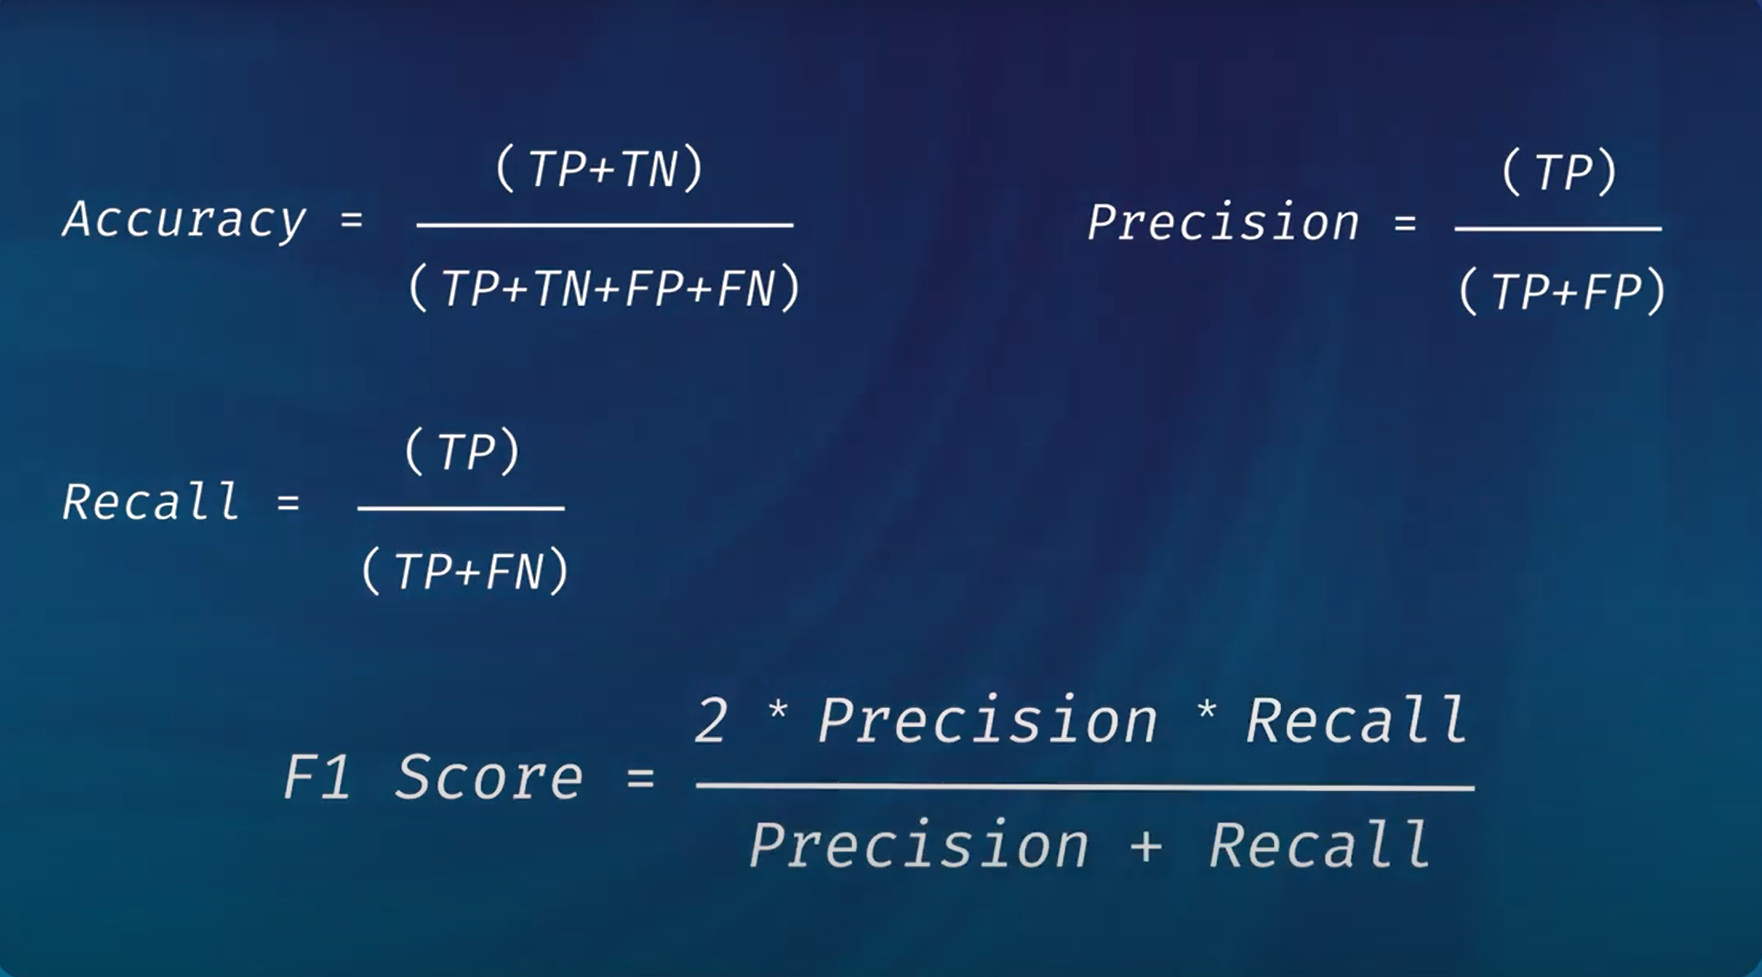

In [ ]:
df = pd.read_csv("breast-cancer.csv")
df.head().T

,0,1,2,3,4
diagnosis,M,M,M,M,M
radius_mean,1.097064,1.829821,1.579888,-0.768909,1.750297
texture_mean,-2.073335,-0.353632,0.456187,0.253732,-1.151816
perimeter_mean,1.269934,1.685955,1.566503,-0.592687,1.776573
area_mean,0.984375,1.908708,1.558884,-0.764464,1.826229
smoothness_mean,1.568466,-0.826962,0.94221,3.283553,0.280372
compactness_mean,3.283515,-0.487072,1.052926,3.402909,0.53934
concavity_mean,2.652874,-0.023846,1.363478,1.915897,1.371011
concave points_mean,2.532475,0.548144,2.037231,1.451707,1.428493
symmetry_mean,2.217515,0.001392,0.939685,2.867383,-0.00956


In [ ]:
df.shape

(569, 31)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,-1.373633e-16,1.00088,-2.029648,-0.689385,-0.215082,0.469393,3.971288
texture_mean,569.0,7.492542e-17,1.00088,-2.229249,-0.725963,-0.104636,0.584176,4.651889
perimeter_mean,569.0,-1.248757e-16,1.00088,-1.984504,-0.691956,-0.235980,0.499677,3.976130
area_mean,569.0,-2.122887e-16,1.00088,-1.454443,-0.667195,-0.295187,0.363507,5.250529
smoothness_mean,569.0,-8.116921e-16,1.00088,-3.112085,-0.710963,-0.034891,0.636199,4.770911
compactness_mean,569.0,1.873136e-16,1.00088,-1.610136,-0.747086,-0.221940,0.493857,4.568425
concavity_mean,569.0,4.995028e-17,1.00088,-1.114873,-0.743748,-0.342240,0.526062,4.243589
concave points_mean,569.0,-3.746271e-17,1.00088,-1.261820,-0.737944,-0.397721,0.646935,3.927930
symmetry_mean,569.0,1.748260e-16,1.00088,-2.744117,-0.703240,-0.071627,0.530779,4.484751
fractal_dimension_mean,569.0,4.838933e-16,1.00088,-1.819865,-0.722639,-0.178279,0.470983,4.910919


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df["diagnosis"] = labelencoder.fit_transform(df["diagnosis"].values)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df, test_size= 0.3, random_state= 42)

In [ ]:
X_train = train.drop("diagnosis", axis = 1)
y_train = train.loc[:,"diagnosis"]

X_test = test.drop("diagnosis", axis = 1)
y_test = test.loc[:,"diagnosis"]

In [ ]:

from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[106,   2],
       [  1,  62]])

In [ ]:
comparison = pd.DataFrame({"Actual Values": y_test, "Predicted Values":predictions})

In [ ]:
comparison

,Actual Values,Predicted Values
204,0,0
70,1,1
131,1,1
431,0,0
540,0,0
...,...,...
69,0,0
542,0,0
176,0,0
501,1,1


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [ ]:
from sklearn.svm import  LinearSVC
model_2 = LinearSVC()

In [ ]:
model_2.fit(X_train, y_train)

LinearSVC()

In [ ]:
predictions_SVM = model_2.predict(X_test)
predictions_SVM

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
comparison_SVM = pd.DataFrame({"Actual Values": y_test, "Predicted Values SVM":predictions_SVM})
comparison_SVM

,Actual Values,Predicted Values SVM
227,0,0
73,1,0
565,1,1
460,1,1
173,0,0
...,...,...
141,1,1
527,0,0
418,0,0
433,1,1


In [ ]:
comparison_SVM[comparison_SVM["Actual Values"] != comparison_SVM["Predicted Values SVM"] ]

,Actual Values,Predicted Values SVM
73,1,0
135,1,0
40,1,0
263,1,0
491,0,1
363,0,1
215,1,0
190,1,0
297,1,0


In [ ]:
confusion_matrix(y_test, predictions_SVM)

array([[109,   2],
       [  7,  53]])

In [ ]:
print(classification_report(y_test, predictions_SVM))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       111
           1       0.96      0.88      0.92        60

    accuracy                           0.95       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



# Naive Bayes

Bayes Theorem

P(A|B) = P(A and B) / P(A)





In [ ]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
 from sklearn.naive_bayes import GaussianNB
 model_gaus = GaussianNB()
 model_gaus.fit(X_train, y_train)

GaussianNB()

In [ ]:
predictions_gaus = model_gaus.predict(X_test)

In [ ]:
predictions_gaus

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [ ]:
confusion_matrix(y_test, predictions_gaus)

array([[100,  10],
       [  5,  56]])

In [ ]:
print(classification_report(y_test,predictions_gaus))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       110
           1       0.85      0.92      0.88        61

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.91       171
weighted avg       0.92      0.91      0.91       171



In [ ]:
comparison_gaus = pd.DataFrame({"Actual Values": y_test, "Predicted Values GAUS":predictions_gaus})
comparison_gaus

,Actual Values,Predicted Values GAUS
364,0,0
385,1,0
72,1,1
20,0,0
74,0,0
...,...,...
568,0,0
102,0,0
152,0,1
134,1,1


In [ ]:
comparison_gaus[comparison_gaus["Actual Values"] != comparison_gaus["Predicted Values GAUS"] ]

,Actual Values,Predicted Values GAUS
385,1,0
290,0,1
81,0,1
297,1,0
86,1,0
157,0,1
73,1,0
318,0,1
112,0,1
541,0,1


# After dropping outlier

In [ ]:
df_copy = df.copy()

In [ ]:
def detect_outlier(df,feature):
    outlierIndices = []
    
    for c in feature:
        # First Quartile
        Q1 = np.percentile(df[c],25)
        
        # Third Quartile
        Q3 = np.percentile(df[c],75)
        
        # IQR
        IQR = Q3 - Q1
        
        # Outlier step
        outlier_step = IQR * 1.5
        
        # Detect outlier and thier indices
        outlier_list_col = df[(df[c]< Q1 - outlier_step) | (df[c]> Q3 + outlier_step)].index
        
        # Store indices
        outlierIndices.extend(outlier_list_col)
    outlierIndices = Counter(outlierIndices)
    multuple_outliers = list(i for i,v in outlierIndices.items() if v > 2)
    
    return multuple_outliers

In [ ]:
df_copy.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df_copy.loc[detect_outlier(df_copy, df_copy.iloc[:,:])]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,1,3.150487,1.307894,3.275896,3.478653,0.707364,3.073153,3.077232,3.497170,0.063458,...,2.843411,1.293432,3.110797,2.955784,1.092890,2.247704,1.801046,2.620403,-0.882913,1.172276
108,1,2.312645,0.088510,2.505640,2.429179,2.579016,3.268353,4.238567,3.440423,2.717694,...,2.512079,0.379878,2.964846,2.600686,1.653990,2.833589,3.303630,2.685877,1.867314,0.772728
122,1,2.874993,0.211845,3.057588,3.145893,3.440117,3.455973,4.243589,3.927930,3.079138,...,2.019222,-0.274754,2.193393,2.096165,1.632072,1.082296,1.478172,1.677876,0.519703,-0.213673
164,1,2.596659,0.640025,2.476807,2.932585,-0.851870,0.192528,0.547405,1.240713,-0.038768,...,2.431317,0.414075,2.291686,2.676276,-0.419448,0.661808,0.588232,1.827097,1.113428,0.439125
180,1,3.718515,0.600465,3.712513,4.536659,0.927977,1.649897,2.489659,3.582290,-0.042419,...,3.489508,1.168042,3.381848,4.105459,0.650148,0.948707,1.256047,2.347847,-0.072405,-0.173220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,0,-0.252003,0.195555,-0.210030,-0.318509,-0.962177,0.340350,0.153179,-0.531076,-0.768957,...,-0.171711,-0.028860,0.230506,-0.258559,-0.537805,1.974164,1.839426,0.321186,-0.090201,2.269510
485,0,-0.476375,-0.670114,-0.375615,-0.506788,-0.086842,0.886153,0.823615,-0.011843,0.987147,...,-0.515468,-0.756771,-0.281214,-0.527344,-0.651778,0.965882,1.043037,0.298347,0.534263,1.078069
242,0,-0.802991,-0.255896,-0.743031,-0.755078,-0.031333,0.533655,0.828637,-0.525659,0.884921,...,-0.763967,0.371736,-0.598731,-0.716671,0.102199,1.466524,2.261608,0.109537,0.658832,2.535505
15,1,0.117215,1.919912,0.196105,0.011123,1.248222,1.045345,0.942887,0.637649,1.794006,...,0.246596,1.865014,0.501557,0.110075,1.553167,2.566410,2.064909,0.861731,2.131012,2.779335


In [ ]:
df_copy = df_copy.drop(detect_outlier(df_copy, df_copy.iloc[:,:]), axis = 0).reset_index(drop = True)

In [ ]:
labelencoder = LabelEncoder()
df_copy["diagnosis"] = labelencoder.fit_transform(df_copy["diagnosis"].values)

In [ ]:
train_copy, test_copy = train_test_split(df_copy, test_size= 0.3, random_state= 42)

In [ ]:
X_train_copy = train_copy.drop("diagnosis", axis = 1)
y_train_copy = train_copy.loc[:,"diagnosis"]

X_test_copy = test_copy.drop("diagnosis", axis = 1)
y_test_copy = test_copy.loc[:,"diagnosis"]

In [ ]:
model_copy = LogisticRegression()

In [ ]:
model_copy.fit(X_train_copy, y_train_copy)

LogisticRegression()

In [ ]:
predictions_copy = model_copy.predict(X_test_copy)

In [ ]:
predictions_copy

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
confusion_matrix(y_test_copy, predictions_copy)

array([[95,  0],
       [ 1, 50]])

In [ ]:
comparison_copy = pd.DataFrame({"Actual Values": y_test_copy, "Predicted Values":predictions_copy})

In [ ]:
comparison_copy

,Actual Values,Predicted Values
420,1,1
262,0,0
431,0,0
448,0,0
364,0,0
...,...,...
116,0,0
45,1,1
16,1,1
449,0,0


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [ ]:
print(classification_report(y_test_copy, predictions_copy))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        95
           1       1.00      0.98      0.99        51

    accuracy                           0.99       146
   macro avg       0.99      0.99      0.99       146
weighted avg       0.99      0.99      0.99       146



In [ ]:
model_2 = LinearSVC()